In [5]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

size = 10000
periods = 10000
# Generate random data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10000, freq='D'),
    'Product': np.random.choice(['A', 'B', 'C'], size),
    'Quantity': np.random.randint(10, 100, size),
    'Warehouse': np.random.choice(['Warehouse1', 'Warehouse2', 'Warehouse3'], size),
    'DeliveryStatus': np.random.choice(['Delivered', 'In Transit', 'Pending'], size),
    'Price': np.random.uniform(50, 200, size),  # New feature: Price
    'LeadTimeDays': np.random.randint(1, 10, size),  # New feature: LeadTimeDays
    'PromotionBudget': np.random.uniform(1000, 5000, size),  # New feature: PromotionBudget
    'CustomerRating': np.random.randint(1, 5, size),  # New feature: CustomerRating
    'Supplier': np.random.choice(['Supplier1', 'Supplier2', 'Supplier3'], size),  # New feature: Supplier
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Date,Product,Quantity,Warehouse,DeliveryStatus,Price,LeadTimeDays,PromotionBudget,CustomerRating,Supplier
0,2023-01-01,C,24,Warehouse2,Delivered,64.087694,9,3599.998810,4,Supplier2
1,2023-01-02,A,27,Warehouse3,Pending,199.926319,8,3676.865691,1,Supplier1
2,2023-01-03,C,91,Warehouse1,Pending,140.753690,1,1630.693248,3,Supplier3
3,2023-01-04,C,97,Warehouse2,Pending,178.059296,1,2813.217777,4,Supplier1
4,2023-01-05,A,11,Warehouse3,In Transit,59.999114,2,2603.163780,4,Supplier2
...,...,...,...,...,...,...,...,...,...,...
9995,2050-05-14,C,67,Warehouse1,Pending,105.058718,3,1488.888431,1,Supplier1
9996,2050-05-15,A,37,Warehouse2,In Transit,140.623021,9,3336.992952,2,Supplier1
9997,2050-05-16,B,23,Warehouse3,Delivered,159.476429,5,1341.719475,4,Supplier1
9998,2050-05-17,B,18,Warehouse1,Delivered,86.819489,2,2042.204494,4,Supplier3


Epoch 1/100, Average Loss: 1.018458400630951
Epoch 2/100, Average Loss: 1.007576185798645
Epoch 3/100, Average Loss: 1.006188045501709
Epoch 4/100, Average Loss: 1.0043350539207458
Epoch 5/100, Average Loss: 1.003822270488739
Epoch 6/100, Average Loss: 1.0032480010986329
Epoch 7/100, Average Loss: 1.0028086401939391
Epoch 8/100, Average Loss: 1.0032634815216064
Epoch 9/100, Average Loss: 1.0026315859794617
Epoch 10/100, Average Loss: 1.002162922859192
Epoch 11/100, Average Loss: 1.0023999938964843
Epoch 12/100, Average Loss: 1.0025757468223573
Epoch 13/100, Average Loss: 1.0018840103149413
Epoch 14/100, Average Loss: 1.0022067806243897
Epoch 15/100, Average Loss: 1.0020743559837342
Epoch 16/100, Average Loss: 1.0022386191368102
Epoch 17/100, Average Loss: 1.001447256374359
Epoch 18/100, Average Loss: 1.003172511768341
Epoch 19/100, Average Loss: 1.0024314525604248
Epoch 20/100, Average Loss: 1.0021932857513427
Epoch 21/100, Average Loss: 1.0020541011810302
Epoch 22/100, Average Loss: 1

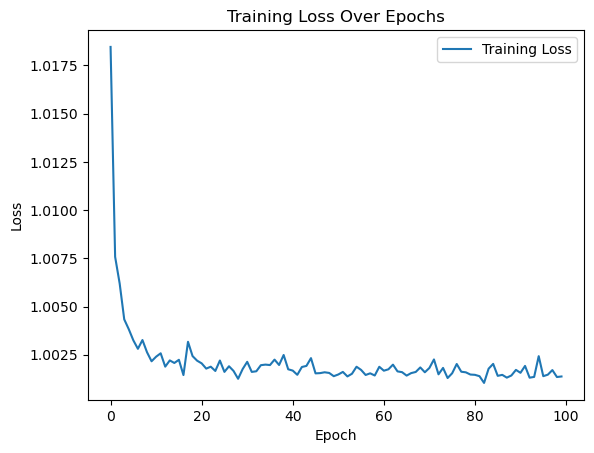

    Quantity       Price  LeadTimeDays  PromotionBudget  CustomerRating  \
0  55.563385  126.552902      4.998453      3079.491211        2.548882   
1  55.563385  126.552902      4.998453      3079.491211        2.548882   
2  55.563385  126.552902      4.998453      3079.491211        2.548882   
3  55.563385  126.552902      4.998453      3079.491211        2.548882   
4  55.563385  126.552902      4.998453      3079.491211        2.548882   

   Product_0  Product_1  Product_2  Warehouse_Warehouse1  \
0    0.37936   0.307331   0.313149              0.324324   
1    0.37936   0.307331   0.313149              0.324324   
2    0.37936   0.307331   0.313149              0.324324   
3    0.37936   0.307331   0.313149              0.324324   
4    0.37936   0.307331   0.313149              0.324324   

   Warehouse_Warehouse2  Warehouse_Warehouse3  DeliveryStatus_Delivered  \
0              0.330339              0.345214                  0.342742   
1              0.330339              0

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

# Numeric and categorical features
numeric_features = ['Quantity', 'Price', 'LeadTimeDays', 'PromotionBudget', 'CustomerRating']
categorical_features = ['Product', 'Warehouse', 'DeliveryStatus', 'Supplier']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Combine numeric and encoded categorical features
df_combined = pd.concat([df[numeric_features], df_encoded.drop(numeric_features, axis=1)], axis=1)

# Separate the datetime column
date_column = df['Date']
df_combined = df_combined.drop('Date', axis=1)

# Select only numeric columns for scaling
numeric_columns = df_combined.columns

# Data preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_combined)
tensor_data = torch.tensor(scaled_data, dtype=torch.float32)

# Model and training setup
learning_rate = 0.01
batch_size = 16
hidden_size = 32
epochs = 100
latent_dim = 32

# Data loader
data_loader = DataLoader(
    TensorDataset(tensor_data), batch_size=batch_size, shuffle=True
)

# Generator model
class DDPMGenerator(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(DDPMGenerator, self).__init__()

        # Define the generator layers
        self.hidden_layer = nn.Linear(latent_dim, 128)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(128, input_dim)

    def forward(self, x):
        # Forward pass
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

# Initialize the model
generator = DDPMGenerator(
    input_dim=len(numeric_columns), latent_dim=latent_dim
)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(generator.parameters(), lr=learning_rate)

losses = []

# Inside your training loop
for epoch in range(epochs):
    total_loss = 0.0  # Initialize total loss
    total_batches = 0  # Count total batches

    for batch in data_loader:
        original_batch_size = batch[0].size(0)  # Get the actual batch size
        noise = torch.randn(original_batch_size, latent_dim)  # Generate random noise
        optimizer.zero_grad()
        
        # Generate samples using the generator
        generated_data = generator(noise)
        
        # Adjust the size of the target tensor
        target = batch[0]
        
        # Calculate loss
        loss = criterion(generated_data, target)
        
        # Backpropagation
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_batches += 1

    # Calculate average loss after each epoch
    avg_loss = total_loss / total_batches
    losses.append(avg_loss)

    # Print average loss after each epoch
    print(f"Epoch {epoch + 1}/{epochs}, Average Loss: {avg_loss}")

# Plot the loss graph
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Generate synthetic data
num_generated_samples = 100
latent_samples = torch.randn(num_generated_samples, latent_dim)
generated_samples = generator(latent_samples)

# Inverse transform to get the data in the original scale
generated_data_original_scale = scaler.inverse_transform(
    generated_samples.detach().numpy()
)

# Convert back to DataFrame
generated_df = pd.DataFrame(
    generated_data_original_scale, columns=numeric_columns
)

# Add back the datetime column
generated_df['Date'] = date_column.head(num_generated_samples).reset_index(drop=True)

# Display the generated DataFrame
print(generated_df.head())


In [28]:
generated_df

,Quantity,Price,LeadTimeDays,PromotionBudget,CustomerRating,Product_0,Product_1,Product_2,Warehouse_Warehouse1,Warehouse_Warehouse2,Warehouse_Warehouse3,DeliveryStatus_Delivered,DeliveryStatus_In Transit,DeliveryStatus_Pending,Supplier_Supplier1,Supplier_Supplier2,Supplier_Supplier3,Date
0,55.563385,126.552902,4.998453,3079.491211,2.548882,0.37936,0.307331,0.313149,0.324324,0.330339,0.345214,0.342742,0.311916,0.344466,0.358123,0.333643,0.308676,2023-01-01
1,55.563385,126.552902,4.998453,3079.491211,2.548882,0.37936,0.307331,0.313149,0.324324,0.330339,0.345214,0.342742,0.311916,0.344466,0.358123,0.333643,0.308676,2023-01-02
2,55.563385,126.552902,4.998453,3079.491211,2.548882,0.37936,0.307331,0.313149,0.324324,0.330339,0.345214,0.342742,0.311916,0.344466,0.358123,0.333643,0.308676,2023-01-03
3,55.563385,126.552902,4.998453,3079.491211,2.548882,0.37936,0.307331,0.313149,0.324324,0.330339,0.345214,0.342742,0.311916,0.344466,0.358123,0.333643,0.308676,2023-01-04
4,55.563385,126.552902,4.998453,3079.491211,2.548882,0.37936,0.307331,0.313149,0.324324,0.330339,0.345214,0.342742,0.311916,0.344466,0.358123,0.333643,0.308676,2023-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,55.563385,126.552902,4.998453,3079.491211,2.548882,0.37936,0.307331,0.313149,0.324324,0.330339,0.345214,0.342742,0.311916,0.344466,0.358123,0.333643,0.308676,2023-04-06
96,55.563385,126.552902,4.998453,3079.491211,2.548882,0.37936,0.307331,0.313149,0.324324,0.330339,0.345214,0.342742,0.311916,0.344466,0.358123,0.333643,0.308676,2023-04-07
97,55.563385,126.552902,4.998453,3079.491211,2.548882,0.37936,0.307331,0.313149,0.324324,0.330339,0.345214,0.342742,0.311916,0.344466,0.358123,0.333643,0.308676,2023-04-08
98,55.563385,126.552902,4.998453,3079.491211,2.548882,0.37936,0.307331,0.313149,0.324324,0.330339,0.345214,0.342742,0.311916,0.344466,0.358123,0.333643,0.308676,2023-04-09


In [22]:
total

,Quantity,Price,LeadTimeDays,PromotionBudget,CustomerRating,Date,Product_0,Product_1,Product_2,Warehouse_Warehouse1,Warehouse_Warehouse2,Warehouse_Warehouse3,DeliveryStatus_Delivered,DeliveryStatus_In Transit,DeliveryStatus_Pending,Supplier_Supplier1,Supplier_Supplier2,Supplier_Supplier3
0,24,64.087694,9,3599.998810,4,2023-01-01,False,False,True,False,True,False,True,False,False,False,True,False
1,27,199.926319,8,3676.865691,1,2023-01-02,True,False,False,False,False,True,False,False,True,True,False,False
2,91,140.753690,1,1630.693248,3,2023-01-03,False,False,True,True,False,False,False,False,True,False,False,True
3,97,178.059296,1,2813.217777,4,2023-01-04,False,False,True,False,True,False,False,False,True,True,False,False
4,11,59.999114,2,2603.163780,4,2023-01-05,True,False,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,67,105.058718,3,1488.888431,1,2050-05-14,False,False,True,True,False,False,False,False,True,True,False,False
9996,37,140.623021,9,3336.992952,2,2050-05-15,True,False,False,False,True,False,False,True,False,True,False,False
9997,23,159.476429,5,1341.719475,4,2050-05-16,False,True,False,False,False,True,True,False,False,True,False,False
9998,18,86.819489,2,2042.204494,4,2050-05-17,False,True,False,True,False,False,True,False,False,False,False,True


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score, classification_report

# Assuming df and df_generated are your DataFrames
real_data = total
synthetic_data = generated_df  # Adjust the dataframe variable

# Define features (X) and target variable (y) for classification
classification_features = ['Quantity', 'Price', 'LeadTimeDays', 'PromotionBudget', 'CustomerRating',
                            'Product_A', 'Product_B', 'Product_C',
                            'Warehouse_Warehouse1', 'Warehouse_Warehouse2', 'Warehouse_Warehouse3',
                            'DeliveryStatus_Delivered', 'DeliveryStatus_In Transit', 'DeliveryStatus_Pending',
                            'Supplier_Supplier1', 'Supplier_Supplier2', 'Supplier_Supplier3', 'Date']

classification_target = 'DeliveryStatus'

# Split the real data into training and testing sets
real_X_train, real_X_test, real_y_train, real_y_test = train_test_split(
    real_data[classification_features], real_data[classification_target], test_size=0.2, random_state=42
)

# Split the synthetic data into training and testing sets
synthetic_X_train, synthetic_X_test, synthetic_y_train, synthetic_y_test = train_test_split(
    synthetic_data[classification_features], synthetic_data[classification_target], test_size=0.2, random_state=42
)

# Train XGBoost on real data
real_model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=len(real_data[classification_target].unique()))
real_model_xgb.fit(real_X_train, real_y_train)

# Predict on real test data
real_predictions_xgb = real_model_xgb.predict(real_X_test)

# Evaluate performance on real data
print("Classification Report - Real Data:")
print(classification_report(real_y_test, real_predictions_xgb))

# Train XGBoost on synthetic data
synthetic_model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=len(synthetic_data[classification_target].unique()))
synthetic_model_xgb.fit(synthetic_X_train, synthetic_y_train)

# Predict on synthetic test data
synthetic_predictions_xgb = synthetic_model_xgb.predict(synthetic_X_test)

# Evaluate performance on synthetic data
print("\nClassification Report - Synthetic Data:")
print(classification_report(synthetic_y_test, synthetic_predictions_xgb))


KeyError: "['Product_A', 'Product_B', 'Product_C'] not in index"

In [21]:
# List of categorical columns in the real_data DataFrame
categorical_columns = ['Product', 'Warehouse', 'DeliveryStatus', 'Supplier']

# Perform one-hot encoding
real_data_encoded = pd.get_dummies(real_data, columns=categorical_columns)

# Display the DataFrame after encoding
real_data_encoded


KeyError: "None of [Index(['Product', 'Warehouse', 'DeliveryStatus', 'Supplier'], dtype='object')] are in the [columns]"